# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Первичный анализ данных. Pandas. </center>

## Credits
[Открытый курс ODS по машинному обучению](https://github.com/Yorko/mlcourse_open) 

## Часть 1.   
  
1. Установите Anaconda (или Miniconda) и запустите Jupyter Notebook
2. Воспроизведите вычисления с семинара (файл `Explore_analysis.Pandas.ipynb`) <br>
   **Note:** Возможно, придется самостоятельно установить библиотеку seaborn. Для этого в Anaconda Prompt выполните `conda install seaborn`
3. Разберите тьюториалы [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) и [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

## Часть 2. Анализ данных по доходу населения UCI Adult

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

В качестве наблюдений в этом наборе данных представлены физические лица, они характеризуются различными признаками. Целевая переменная **salary** - доход человека > 50K или <= 50K.

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.neighbors import KNeighborsClassifier

# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [58]:
data = pd.read_csv('adult.data.csv', delimiter = ", ")
data.head()

<ipython-input-58-020207ccd11f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('adult.data.csv', delimiter = ", ")


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Определите размерность данных: сколько наблюдений и сколько признаков**

In [59]:
# Ваш код здесь
print("Size of data: ", data.shape[0])
print("Labels: ", ', '.join(data.columns.values))

Size of data:  32561
Labels:  age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary


**Список признаков**  
**На источнике описание признаков скудное, но названия почти у всех признаков говорящие**

In [60]:
print('\n'.join(data.columns.values.tolist()))

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


**Проверьте, присутствуют ли в данных [пропущенные значения](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Сколько? В каких признаках?**  
**Удалите наблюдения с пропущенными значениями**

In [71]:
# Ваш код здесь
data_unfilled = pd.concat([data[data[column] == '?'] for column in data.columns], 0)
print("Rows with missing data: ", data_unfilled.shape[0])

labels_unfilled = [column for column in data.columns if data[data[column] == '?'].shape[0]]
print("Labels with missing data: ", ', '.join(labels_unfilled))

clear_data = data.drop(data_unfilled.index)
print("Cleared rows: ", clear_data.shape[0])

Rows with missing data:  4262
Labels with missing data:  workclass, occupation, native-country
Cleared rows:  30162


**Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.**

In [75]:
# Ваш код здесь
data.age.dtypes

dtype('int64')

**Для категориальных признаков выведите список категорий**

In [83]:
# Ваш код здесь        
categories = [set(data[label].values) for label in data.columns if data[label].dtypes == 'object']
cat_labels = [label for label in data.columns if data[label].dtypes == 'object']

categories_dict = dict(zip(cat_labels, [', '.join(cat) for cat in categories]))

categories_dict

{'workclass': 'Self-emp-inc, Local-gov, State-gov, Self-emp-not-inc, ?, Never-worked, Federal-gov, Without-pay, Private',
 'education': '12th, Doctorate, Masters, 1st-4th, 10th, 11th, Assoc-voc, Prof-school, Assoc-acdm, Bachelors, Some-college, 5th-6th, Preschool, HS-grad, 7th-8th, 9th',
 'marital-status': 'Married-AF-spouse, Divorced, Separated, Never-married, Married-spouse-absent, Married-civ-spouse, Widowed',
 'occupation': 'Tech-support, Exec-managerial, Transport-moving, Prof-specialty, ?, Priv-house-serv, Adm-clerical, Handlers-cleaners, Protective-serv, Armed-Forces, Farming-fishing, Other-service, Sales, Machine-op-inspct, Craft-repair',
 'relationship': 'Unmarried, Other-relative, Own-child, Wife, Not-in-family, Husband',
 'race': 'Asian-Pac-Islander, Other, Amer-Indian-Eskimo, Black, White',
 'sex': 'Female, Male',
 'native-country': 'Ecuador, Thailand, Germany, Cambodia, Peru, Puerto-Rico, Ireland, El-Salvador, Trinadad&Tobago, Philippines, Hungary, Honduras, Greece, Mexico

### Используя функции и методы Pandas, ответьте на вопросы:

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [86]:
# Ваш код здесь
for cat in categories_dict['sex'].split(', '):
    print(cat, ' ', data[data['sex'] == cat].shape[0])

Female   10771
Male   21790


**2. Каков средний возраст (признак *age*) женщин?**

In [87]:
# Ваш код здесь
data[data.sex == "Female"].age.mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [90]:
# Ваш код здесь
print(data[data['native-country'] == 'Germany'].shape[0] / data.shape[0] * 100, '%')

0.42074874850281013 %


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

<AxesSubplot:xlabel='education', ylabel='number'>

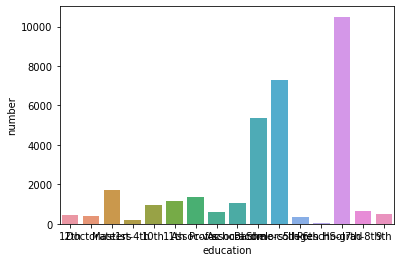

In [127]:
# Ваш код здесь
ed_info = [pd.DataFrame([[ed, data[data.education == ed].shape[0]]], columns = ['education', 'number']) for ed in categories_dict['education'].split(', ')]
ed_info = pd.concat(ed_info, ignore_index = True)
ed_info
sns.barplot(x="education", y="number", data=ed_info)

__5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак _salary_) и тех, кто получает менее 50K в год?__  
  
**Tip:** Используйте методы `groupby` и `agg`.

In [104]:
# Ваш код здесь
print("Mean")
print(data.groupby(['salary'])['age'].mean())
print("STD")
print(data.groupby(['salary'])['hours-per-week'].std())

Mean
salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64
DX
salary
<=50K    12.318995
>50K     11.012971
Name: hours-per-week, dtype: float64


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**  
  
**Tip:** Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает `True` если условие выполняется (т.е. ответ на вопрос - да, правда) и `False` иначе.

In [117]:
# Ваш код здесь
high_ed = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
for ed in data[(data.salary == '>50K')].education.tolist():
    if ed not in high_ed:
        print("False")
        break

False


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**  
  
**Tip:** Максимальный возраст мужчин расы *Amer-Indian-Eskimo* необходимо получить из таблицы, полученной в результате использования методов *groupby* и *describe*. Почитайте про [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/advanced.html).

In [187]:

iterables = [set(data.race), set(data.sex)]
iterables = pd.MultiIndex.from_product(iterables, names=["race", "sex"])
age_stats = [pd.DataFrame([data[(data.race == race_i) & (data.sex == sex_i)].age.describe()]) for sex_i in set(data.sex) for race_i in set(data.race)]
age_stats_df = pd.concat(age_stats, ignore_index = True)
age_stats_df = age_stats_df.set_index(iterables)
print("Max Amer-Indian-Eskimo men's age: ", age_stats_df.loc['Amer-Indian-Eskimo', 'Male']['max'])
age_stats_df



Max Amer-Indian-Eskimo men's age:  90.0


count       mean        std   min   25%   50%  \
race               sex                                                       
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      109.0  31.678899  11.631599  17.0  23.0  29.0   
Other              Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male     1555.0  37.854019  12.637197  17.0  28.0  37.0   
Amer-Indian-Eskimo Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female    162.0  34.654321  11.355531  17.0  26.0  32.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
White              Female   1569.0  37.682600  12.882612  17.0  27.0  36.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    39.00  74.0  
Other              Female  46.00  80.0  
                   Male    46.00  90.0  
Amer-Indian-Eskimo Female  46.00  90.0  
                   Male    46.00  90.0  
Black              Female  42.00  77.0  
                   Male    45.00  82.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [200]:
# Ваш код здесь
married = [row for index, row in data.iterrows() if 'Married' in row['marital-status'] and row['salary'] == '>50K']
married_percent = len(married)/data[data['salary'] == '>50K'].shape[0]
not_married_percent = 1 - married_percent

print("Married -", married_percent * 100, "% VS", "Not Married -", not_married_percent * 100, '%')

Married - 85.9074097691621 % VS Not Married - 14.092590230837898 %


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [210]:
# Ваш код здесь
max_hours = data['hours-per-week'].describe()['max']
hard_workers_df = data[data['hours-per-week'] == max_hours]
print('Hard workers number: ', hard_workers_df.shape[0])
print('Hard workers and rich percent: ', hard_workers_df[hard_workers_df['salary'] == '>50K'].shape[0] / hard_workers_df.shape[0] * 100, '%')

Hard workers number:  85
Hard workers and rich percent:  29.411764705882355 %


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**  
  
**Tip:** Необходимо построить `barplot` для каждой страны с разбивкой по признаку *salary*. Используйте [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).  
Пример графика: ![](task_10_example.png)

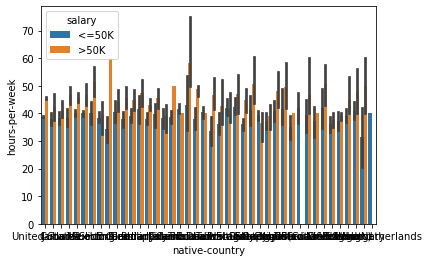

In [245]:
# Ваш код здесь
# rich_hours_s = data[data['salary'] == '>50K'].groupby('native-country')['hours-per-week'].mean()
# poor_hours_s = data[data['salary'] == '<=50K'].groupby('native-country')['hours-per-week'].mean()
# mean_hours_df = pd.concat([rich_hours_s, poor_hours_s],axis=1, ignore_index = True)
# mean_hours_df.columns = ['>50K','<=50K']
# mean_hours_df.index = [ i for i in range(len(mean_hours_df.index))]
# mean_hours_df
data.groupby(['native-country', 'salary'])['hours-per-week'].mean()
graph = sns.barplot(x="native-country", y="hours-per-week", hue="salary", data=data)

Я считаю, что...
- Пункт 1
- Пункт 2
    - Подпункт 1
    - Подпункт 2
    
[Статья](https://arxiv.org/pdf/2011.08036.pdf)

Текст $E=mc^2$ ещё *текст* $*$

###### Заголовок